In [1]:

#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None) #show all columns to understand data better
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
#import data into relevant dataframes
#app_data = pd.read_csv(r'G:\Data Science\Data Toolkit - EDA Case Study\EDA Case Study\application_data.csv')
#prev_app = pd.read_csv(r'G:\Data Science\Data Toolkit - EDA Case Study\EDA Case Study\previous_application.csv')
app_data = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')

In [5]:
#Check the details for dataframe app_data
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [6]:
#Check the details for dataframe prev_app
prev_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [7]:
# Checking Shape of application data
# contains 122 columns, 307511 rows 
app_data.shape

(307511, 122)

In [8]:
#Checking the first 5 rows
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [9]:
#Statistics for Application data
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

In [10]:
#Finding %age of Null values in application data (sorted in descending order)
pd.pandas.set_option('display.max_rows', app_data.shape[0]+1) #code to show all rows instead of 50
((app_data.isnull().sum()/len(app_data))*100).sort_values(ascending = False)
#48 variables have >47% null values, hence needs to be dropped

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
NONLIVINGAPARTMENTS_AVG        69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MEDI          68.35
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
FLOORSMIN_MEDI                 67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_AVG                  67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_AVG                66.50
YEARS_BUILD_MODE               66.50
OWN_CAR_AGE                    65.99
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
LANDAREA_MEDI                  59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MEDI             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MODE             55.18
E

In [11]:
#Dropping all the columns from application data that have null percentage greater than 47%
app_data=app_data.loc[:,app_data.isnull().mean() < 0.47]

In [12]:
#Checking the shape of application data after dropping the columns
# Note the columns have reduced to 73 from 122
app_data.shape

(307511, 73)

In [13]:
pd.pandas.set_option('display.max_rows', 50) # revert back to showing only top 50 rows for long data sets

In [14]:
#Understanding the columns that have mean %age around 13% with describe function
app_data.loc[:,(app_data.isnull().mean() < 0.14) & (app_data.isnull().mean() > 0.12)].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,0.01,0.01,0.03,0.27,0.27,1.90
std,0.08,0.11,0.20,0.92,0.79,1.87
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,0.00,0.00,0.00,0.00,3.00
max,4.00,9.00,8.00,27.00,261.00,25.00


In [15]:
#Checking which values will be best to impute for each of these column one by one
#for below replacing the null value with 0 could be a good approximation as 99.4% values have 0 
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)

0.00   0.99
1.00   0.01
2.00   0.00
3.00   0.00
4.00   0.00
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [16]:
#Checking which values will be best to impute for column AMT_REQ_CREDIT_BUREAU_DAY
#for below replacing the null value with 0 could be a good approximation as 99.4% values have 0 
app_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)

0.00   0.99
1.00   0.00
2.00   0.00
3.00   0.00
4.00   0.00
5.00   0.00
6.00   0.00
9.00   0.00
8.00   0.00
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [17]:
#Checking which values will be best to impute for column AMT_REQ_CREDIT_BUREAU_WEEK
#for below replacing the null value with 0 could be a good approximation as 96.7% values have 0 
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)

0.00   0.97
1.00   0.03
2.00   0.00
3.00   0.00
4.00   0.00
6.00   0.00
5.00   0.00
8.00   0.00
7.00   0.00
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [18]:
#Checking which values will be best to impute for column AMT_REQ_CREDIT_BUREAU_MON
#for below replacing the null value with 0 could be a good approximation as 83.5% values have 0 
app_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)

0.00    0.84
1.00    0.12
2.00    0.02
3.00    0.01
4.00    0.00
5.00    0.00
6.00    0.00
7.00    0.00
9.00    0.00
8.00    0.00
10.00   0.00
11.00   0.00
12.00   0.00
13.00   0.00
14.00   0.00
15.00   0.00
16.00   0.00
17.00   0.00
18.00   0.00
19.00   0.00
24.00   0.00
27.00   0.00
22.00   0.00
23.00   0.00
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [19]:
#Checking which values will be best to impute for column AMT_REQ_CREDIT_BUREAU_QRT
#for below replacing the null value with 0 could be a good approximation as 80.9% values have 0 
app_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)

0.00     0.81
1.00     0.13
2.00     0.05
3.00     0.01
4.00     0.00
5.00     0.00
6.00     0.00
7.00     0.00
8.00     0.00
19.00    0.00
261.00   0.00
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [20]:
#Checking which values will be best to impute for for column AMT_REQ_CREDIT_BUREAU_YEAR
#Not getting a definitive view from below, may be mean be round mean to nearest integer i.e 2 is the best option here. 
#We are not sure whether the data is normally distributed, hence median is a better substitue. Median is 1
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)

0.00    0.27
1.00    0.24
2.00    0.19
3.00    0.13
4.00    0.08
5.00    0.05
6.00    0.03
7.00    0.01
8.00    0.01
9.00    0.00
11.00   0.00
12.00   0.00
10.00   0.00
13.00   0.00
14.00   0.00
17.00   0.00
15.00   0.00
19.00   0.00
18.00   0.00
16.00   0.00
21.00   0.00
23.00   0.00
25.00   0.00
20.00   0.00
22.00   0.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [21]:
#Median 1.0 could be a good value to replace for below column
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

In [22]:
#Checking which values will be best to impute for for column OCCUPATION_TYPE
#Setting the values Null value to "Unknown" could be an option here
app_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
#Checking data types for application data
app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
                               ...   
FLAG_DOCUMEN

In [24]:
#Comparing application data with data types
app_data.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,0.14,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,nan,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.73,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,nan,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-4311.00,-3458,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,nan,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.04,-16941,-1588,-4970.00,-477,1,1,1,1,1,0,Laborers,2.00,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.35,0.62,0.00,0.00,0.00,0.00,-2536.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,1.00
6,100009,0,Cash loans,F,Y,Y,1,171000.00,1560726.00,41301.00,1395000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04,-13778,-3130,-1213.00,-619,1,1,0,1,1,0,Accountants,3.00,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.72,0.49,1.00,0.00,1.00,0.00,-1562.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,1.00,2.00
7,100010,0,Cash loans,M,Y,Y,0,360000.00,1530000.00,42075.00,1530000.00,Unaccompanied,State servant,Higher education,M

In [25]:
#Identified five columns that have negative values, to be changed to absolute value
# No date dates columns identified
#DAYS_BIRTH                       int64 -  change to absolute
#DAYS_EMPLOYED                    int64 - change to absolute
#DAYS_REGISTRATION              float64 -change to absolute
#DAYS_ID_PUBLISH                  int64 - change to absolute
#DAYS_LAST_PHONE_CHANGE         float64 - change to absolute
#FLAG_OWN_CAR                    object - change to boolean - double check on this 
#FLAG_OWN_REALTY                 object - change to boolean - double check on tihs
app_data.DAYS_BIRTH=app_data.DAYS_BIRTH.abs()
app_data.DAYS_EMPLOYED =app_data.DAYS_EMPLOYED.abs()
app_data.DAYS_REGISTRATION=app_data.DAYS_REGISTRATION.abs()
app_data.DAYS_ID_PUBLISH=app_data.DAYS_ID_PUBLISH.abs()
app_data.DAYS_LAST_PHONE_CHANGE=app_data.DAYS_LAST_PHONE_CHANGE.abs()


In [26]:
# Converting the days variables to corresponding years
app_data.DAYS_BIRTH=app_data.DAYS_BIRTH/365
app_data.DAYS_EMPLOYED =app_data.DAYS_EMPLOYED/365
#app_data.DAYS_REGISTRATION=app_data.DAYS_REGISTRATION
#app_data.DAYS_ID_PUBLISH=app_data.DAYS_ID_PUBLISH/365
#app_data.DAYS_LAST_PHONE_CHANGE=app_data.DAYS_LAST_PHONE_CHANGE/365



   

In [27]:
app_data.rename(columns={"DAYS_BIRTH":"YEARS_BIRTH","DAYS_EMPLOYED":"YEARS_EMPLOYED"}, inplace= True)

In [28]:
app_data["YEARS_EMPLOYED"]=app_data["YEARS_EMPLOYED"].astype(dtype=float,errors='raise')
app_data["YEARS_BIRTH"]=app_data["YEARS_BIRTH"].astype(dtype=float,errors='raise')

#app_data["YEARS_EMPLOYED"== 1000.67,"YEARS_EMPLOYED"]="NEW VALUE"


In [29]:
app_data["YEARS_BIRTH"].value_counts()

37.67    43
36.93    42
49.99    41
27.45    41
28.20    40
43.21    40
39.44    39
39.09    39
31.96    39
36.34    39
40.52    38
41.21    38
37.22    38
37.35    38
37.78    38
42.64    38
36.93    38
38.06    38
40.79    37
35.08    37
40.52    37
27.92    37
27.77    37
36.21    37
39.11    37
         ..
68.71     1
68.16     1
68.98     1
68.94     1
68.62     1
68.73     1
67.36     1
68.21     1
68.11     1
65.36     1
69.02     1
21.91     1
68.84     1
66.44     1
68.16     1
68.79     1
68.76     1
21.62     1
68.62     1
66.94     1
68.42     1
68.94     1
21.41     1
68.81     1
68.58     1
Name: YEARS_BIRTH, Length: 17460, dtype: int64

In [30]:
#checking application data after changing data frame
app_data.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25.92,1.75,3648.00,2120,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,0.14,2.00,2.00,2.00,2.00,1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45.93,3.25,1186.00,291,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,nan,1.00,0.00,1.00,0.00,828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52.18,0.62,4260.00,2531,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.73,0.00,0.00,0.00,0.00,815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,52.07,8.33,9833.00,2437,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,nan,2.00,0.00,2.00,0.00,617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,54.61,8.32,4311.00,3458,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,nan,0.00,0.00,0.00,0.00,1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.04,46.41,4.35,4970.00,477,1,1,1,1,1,0,Laborers,2.00,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.35,0.62,0.00,0.00,0.00,0.00,2536.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,1.00
6,100009,0,Cash loans,F,Y,Y,1,171000.00,1560726.00,41301.00,1395000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04,37.75,8.58,1213.00,619,1,1,0,1,1,0,Accountants,3.00,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.72,0.49,1.00,0.00,1.00,0.00,1562.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,1.00,2.00
7,100010,0,Cash loans,M,Y,Y,0,360000.00,1530000.00,42075.00,1530000.00,Unaccompanied,State servant,Higher education,Married,House / apartment,0.00,

In [31]:
app_data.AMT_INCOME_TOTAL.value_counts(normalize=True)
app_data.AMT_INCOME_TOTAL.describe()

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [32]:
#Checking data types for application data
app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
YEARS_BIRTH                   float64
YEARS_EMPLOYED                float64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
                               ...   
FLAG_DOCUMEN

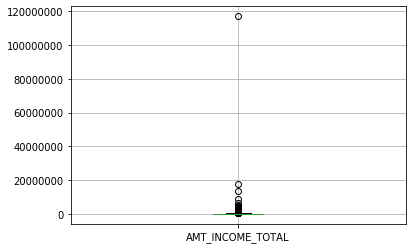

In [33]:
#outlier analysis for AMT_INCOME_TOTAL
fig, ax=plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain')
app_data.boxplot('AMT_INCOME_TOTAL')
plt.show()

#Total income has outliers that go way beyond the whiskers, this will prevent meaningful analysis on this column
#until the outliers are taken care of

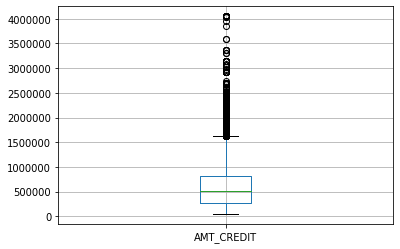

In [34]:
#outlier analysis for AMT_CREDIT
fig, ax=plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain')
app_data.boxplot('AMT_CREDIT')
plt.show()

#The median credit amount of the loan is 500,000.  Majority of the loans have credit amount under 1,600,000
#outliers needs to be addressed

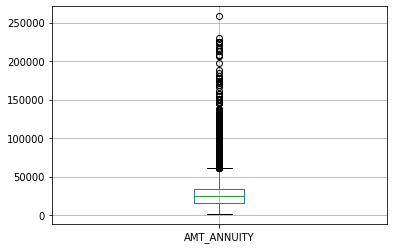

In [35]:
#outlier analysis for AMT_ANNUITY
fig, ax=plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain')
app_data.boxplot('AMT_ANNUITY')
plt.show()

#outliers needs to be addressed
#Souvik to check

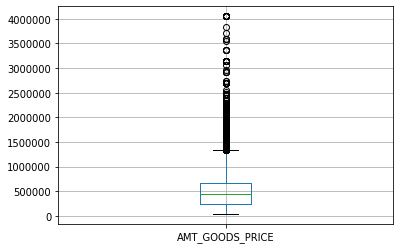

In [36]:
#outlier analysis for AMT_GOODS_PRICE
fig, ax=plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain')
app_data.boxplot('AMT_GOODS_PRICE')
plt.show()

#Outliers needs to be addressed
#Majority of applications have Good Price amount under 1,500,000
#Souvik to check

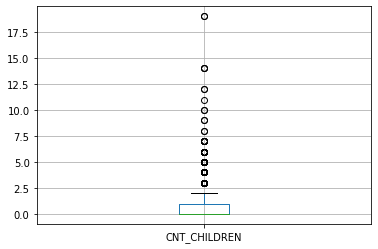

In [37]:
#outlier analysis for CNT_CHILDREN
app_data.boxplot('CNT_CHILDREN')
plt.show()

#Majority of application have less than 3 children
#Outliers needs to be checked
#Souvik to check

## <span style="color:blue">Binning relevant variables

In [38]:
#Binning for Total AMT_INCOME_TOTAL
#To be refined
app_data["INCOME_TOTAL_CAT"]=pd.qcut(app_data.AMT_INCOME_TOTAL,[0,0.1,0.2,0.4,0.6,0.8,0.95,1],labels=['VERY LOW','LOW','MIDDLE LOW','MIDDLE','MIDDLE HIGH','HIGH','ULTRA HIGH'])
app_data["INCOME_TOTAL_CAT"].value_counts(normalize=True)

MIDDLE LOW    0.28
MIDDLE HIGH   0.25
MIDDLE        0.12
VERY LOW      0.11
HIGH          0.11
LOW           0.10
ULTRA HIGH    0.05
Name: INCOME_TOTAL_CAT, dtype: float64

In [39]:
#Binning for Total CNT_CHILDREN
app_data["CHILDREN_CAT"]=pd.cut(app_data.CNT_CHILDREN,[-0.1,0.9,1.9,2.9,4.9,20],labels=['No Children','One Child','Two Children','Three or Four','More than Four'])
app_data["CHILDREN_CAT"].value_counts()

No Children       215371
One Child          61119
Two Children       26749
Three or Four       4146
More than Four       126
Name: CHILDREN_CAT, dtype: int64

In [40]:
app_data[['CHILDREN_CAT','CNT_CHILDREN']].head(15)

,CHILDREN_CAT,CNT_CHILDREN
0,No Children,0
1,No Children,0
2,No Children,0
3,No Children,0
4,No Children,0
5,No Children,0
6,One Child,1
7,No Children,0
8,No Children,0
9,No Children,0


In [41]:
#Binning for Age i.e YEARS_BIRTH
app_data['YEARS_BIRTH_CAT']=pd.cut(app_data['YEARS_BIRTH'], bins=[20,31,41,51,61,71,150], labels=['Twenties', 'Thirties', 'Forties','Fifties','Sixties','Seventies+'])
app_data['YEARS_BIRTH_CAT'].value_counts()


Thirties      83110
Forties       74394
Fifties       67818
Twenties      52837
Sixties       29352
Seventies+        0
Name: YEARS_BIRTH_CAT, dtype: int64

In [42]:
# None of the applicants have age less than 20
app_data[app_data["YEARS_BIRTH"] < 20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_TOTAL_CAT,CHILDREN_CAT,YEARS_BIRTH_CAT


In [43]:
#binning for DAYS_LAST_PHONE_CHANGE

app_data['DAYS_LAST_PHONE_CHANGE_CAT']=pd.cut(app_data['DAYS_LAST_PHONE_CHANGE'],bins=[-1,0,1,7,30,91,180,363,1095,3650,1000000],labels=['Today','One Day','Less than One Week','Less than One Month','Less than Three Months','Less than Six Months','Less than One Year','Less than Three Years','Less than Ten Years','More than Ten Years'])
app_data['DAYS_LAST_PHONE_CHANGE_CAT'].value_counts()


Less than Ten Years       119171
Less than Three Years      95875
Today                      37672
Less than One Year         28332
Less than Six Months        8719
Less than One Week          7169
Less than Three Months      4193
Less than One Month         3345
One Day                     2812
More than Ten Years          222
Name: DAYS_LAST_PHONE_CHANGE_CAT, dtype: int64

In [44]:
app_data['DAYS_LAST_PHONE_CHANGE'].describe()

count   307510.00
mean       962.86
std        826.81
min          0.00
25%        274.00
50%        757.00
75%       1570.00
max       4292.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [45]:
#Binning for DAYS_REGISTRATION
app_data['DAYS_REGISTRATION_CAT']=pd.cut(app_data['DAYS_REGISTRATION'],bins=[-1,0,1,7,30,91,180,363,1095,3650,1000000],labels=['Today','One Day','Less than One Week','Less than One Month','Less than Three Months','Less than Six Months','Less than One Year','Less than Three Years','Less than Ten Years','More than Ten Years'])

app_data['DAYS_REGISTRATION_CAT'].value_counts()
#app_data['DAYS_REGISTRATION'].describe()

More than Ten Years       181296
Less than Ten Years        78751
Less than Three Years      30657
Less than One Year          7903
Less than Six Months        3869
Less than Three Months      2913
Less than One Month         1381
Less than One Week           548
One Day                      113
Today                         80
Name: DAYS_REGISTRATION_CAT, dtype: int64

In [46]:
#Binning for DAYS_ID_PUBLISH_CAT
app_data['DAYS_ID_PUBLISH_CAT']=pd.cut(app_data['DAYS_ID_PUBLISH'],bins=[-1,0,1,7,30,91,180,363,1095,3650,1000000],labels=['Today','One Day','Less than One Week','Less than One Month','Less than Three Months','Less than Six Months','Less than One Year','Less than Three Years','Less than Ten Years','More than Ten Years'])
app_data['DAYS_ID_PUBLISH_CAT'].value_counts()

More than Ten Years       132996
Less than Ten Years       126330
Less than Three Years      33337
Less than One Year          7062
Less than Six Months        3418
Less than Three Months      2566
Less than One Month         1327
Less than One Week           395
One Day                       64
Today                         16
Name: DAYS_ID_PUBLISH_CAT, dtype: int64

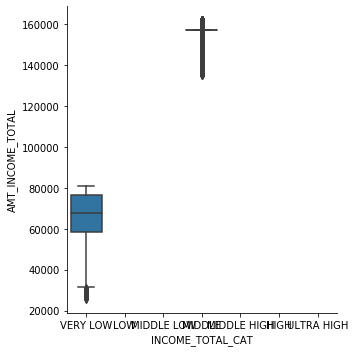

In [47]:
# Boxplot of Income amounts
sns.catplot(x="INCOME_TOTAL_CAT", y="AMT_INCOME_TOTAL", kind="box",data=app_data[app_data["INCOME_TOTAL_CAT"].isin(['VERY LOW','LOWER','MIDDLE','UPPER'])])
plt.show()

In [48]:
#Checking imbalabnce
app_data['TARGET'].value_counts(normalize=True)
#92% of loans have not defaulted indicating that there is data imbalance

0   0.92
1   0.08
Name: TARGET, dtype: float64

In [49]:
#Splitting app_data into 2 dataframes, target=1 and target = 0
app_data_1 = app_data[app_data['TARGET']==1]
app_data_0 = app_data[app_data['TARGET']==0]

In [52]:
app_data_0.shape

(282686, 79)

In [48]:
app_data_1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_TOTAL_CAT,CHILDREN_CAT,YEARS_BIRTH_CAT,DAYS_LAST_PHONE_CHANGE_CAT,DAYS_REGISTRATION_CAT,DAYS_ID_PUBLISH_CAT
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25.92,1.75,3648.00,2120,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,0.14,2.00,2.00,2.00,2.00,1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,MIDDLE HIGH,No Children,Twenties,Less than Ten Years,Less than Ten Years,Less than Ten Years
26,100031,1,Cash loans,F,N,Y,0,112500.00,979992.00,27076.50,702000.00,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.02,51.30,7.20,6573.00,1827,1,1,0,1,0,0,Cooking staff,1.00,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.55,0.19,10.00,1.00,10.00,0.00,161.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.00,0.00,0.00,0.00,2.00,2.00,MIDDLE LOW,No Children,Fifties,Less than Six Months,More than Ten Years,Less than Ten Years
40,100047,1,Cash loans,M,N,Y,0,202500.00,1193580.00,35028.00,855000.00,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.03,47.90,3.46,1182.00,1029,1,1,0,1,0,0,Laborers,2.00,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.31,0.32,0.00,0.00,0.00,0.00,1075.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,4.00,MIDDLE HIGH,No Children,Forties,Less than Three Years,Less than Ten Years,Less than Three Years
42,100049,1,Cash loans,F,N,N,0,135000.00,288873.00,16258.50,238500.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,36.67,9.85,45.00,4409,1,1,1,1,1,0,Sales staff,2.00,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.67,0.40,1.00,0.00,1.00,0.00,1480.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,2.00,MIDDLE LOW,No Children,Thirties,Less than Ten Years,Less than Three Months,More than Ten Years
81,100096,1,Cash loans,F,N,Y,0,81000.00,252000.00,14593.50,252000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.03,67.93,1000.67,5391.00,4199,1,0,0,1,0,0,NaN,2.00,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.02,0.72,1.00,1.00,1.00,1.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,VERY LOW,No Children,Sixties,Today,More than Ten Years,More than Ten Years
94,100112,1,Cash loans,M,Y,Y,0,315000.00,953460.00,64107.00,900000.00,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.03,27.94,5.52,4802.00,1038,1,1,0,1,0,0,NaN,1.00,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.43,0.08,0.00,0.00,0.00,0.00,

In [49]:
app_data_0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_TOTAL_CAT,CHILDREN_CAT,YEARS_BIRTH_CAT,DAYS_LAST_PHONE_CHANGE_CAT,DAYS_REGISTRATION_CAT,DAYS_ID_PUBLISH_CAT
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45.93,3.25,1186.00,291,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,nan,1.00,0.00,1.00,0.00,828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,HIGH,No Children,Forties,Less than Three Years,Less than Ten Years,Less than One Year
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52.18,0.62,4260.00,2531,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.73,0.00,0.00,0.00,0.00,815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,VERY LOW,No Children,Fifties,Less than Three Years,More than Ten Years,Less than Ten Years
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,52.07,8.33,9833.00,2437,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,nan,2.00,0.00,2.00,0.00,617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,MIDDLE LOW,No Children,Fifties,Less than Three Years,More than Ten Years,Less than Ten Years
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,54.61,8.32,4311.00,3458,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,nan,0.00,0.00,0.00,0.00,1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,MIDDLE LOW,No Children,Fifties,Less than Ten Years,More than Ten Years,Less than Ten Years
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.04,46.41,4.35,4970.00,477,1,1,1,1,1,0,Laborers,2.00,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.35,0.62,0.00,0.00,0.00,0.00,2536.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,1.00,LOW,No Children,Forties,Less than Ten Years,More than Ten Years,Less than Three Years
6,100009,0,Cash loans,F,Y,Y,1,171000.00,1560726.00,41301.00,1395000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04,37.75,8.58,1213.00,619,1,1,0,1,1,0,Accountants,3.00,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.72,0.49,1.00,0.00,1.00,0.00,1562.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

## UNIVARIATE ANALYSIS ON CATEGORICAL VARIABLES

### Analysis to be performed
#### 1. Age Category
#### 2. Occupation Type
#### 3. Income Range
#### 4. Education
#### 5. Type of loan (cash/revolving)
#### 6. Gender
#### 7. No. of children
#### 8. Days Phone Change
#### 9. Days ID Publish

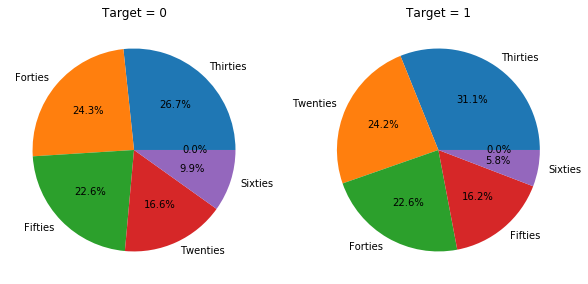

In [50]:
# Analyzing impact of age category on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['YEARS_BIRTH_CAT'].value_counts().plot.pie(ax = ax1,  figsize = [10,6],label='',title = 'Target = 0',autopct='%1.1f%%')
app_data_1['YEARS_BIRTH_CAT'].value_counts().plot.pie(ax=ax2,  figsize = [10,6],label='',title = 'Target = 1',autopct='%1.1f%%')
plt.show()

# Majority of loans are taken by Middle age customers. 61% of the defaults also come from Middle Age customers.

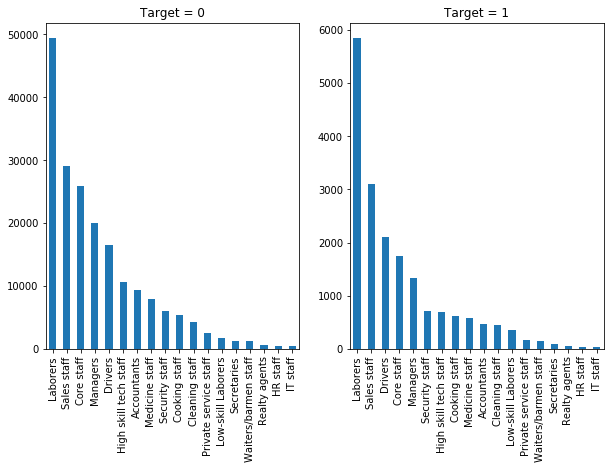

In [51]:
# Analyzing impact of occupation type on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['OCCUPATION_TYPE'].value_counts().plot.bar(ax = ax1,  figsize = [10,6],title = 'Target = 0')
app_data_1['OCCUPATION_TYPE'].value_counts().plot.bar(ax = ax2,  figsize = [10,6],title = 'Target = 1')

plt.show()

# Insight to be documented
# The trend are similar in both graph, interesting that the same set of occupation is without payment difficulty and with payment difficulty

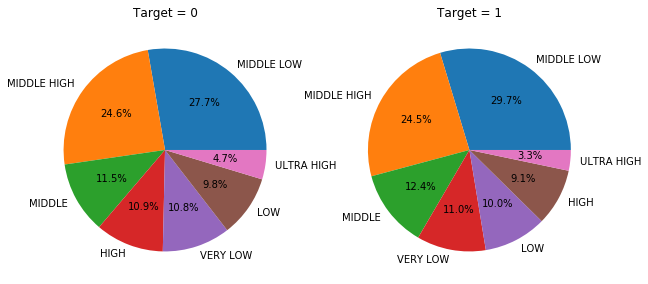

In [52]:
# Analyzing impact of income category on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['INCOME_TOTAL_CAT'].value_counts().plot.pie(ax = ax1,  figsize = [10,6],label='',title = 'Target = 0',autopct='%1.1f%%')
app_data_1['INCOME_TOTAL_CAT'].value_counts().plot.pie(ax=ax2,  figsize = [10,6],label='',title = 'Target = 1',autopct='%1.1f%%')
plt.show()

# Insight to be documented
#Again very similar charts for both default and no default

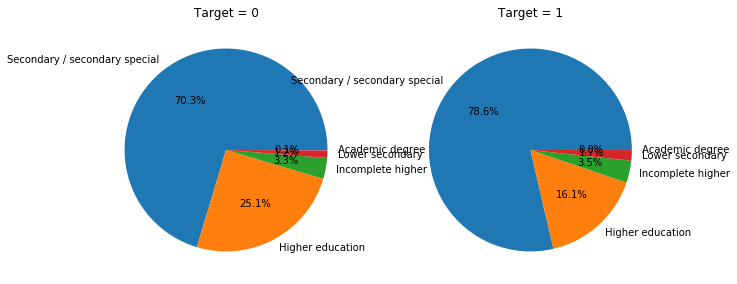

In [53]:
# Analyzing impact of Education Type on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['NAME_EDUCATION_TYPE'].value_counts().plot.pie(ax = ax1,  figsize = [10,6],label='',title = 'Target = 0',autopct='%1.1f%%')
app_data_1['NAME_EDUCATION_TYPE'].value_counts().plot.pie(ax=ax2,  figsize = [10,6],label='',title = 'Target = 1',autopct='%1.1f%%')
plt.show()

# Insight to be documented

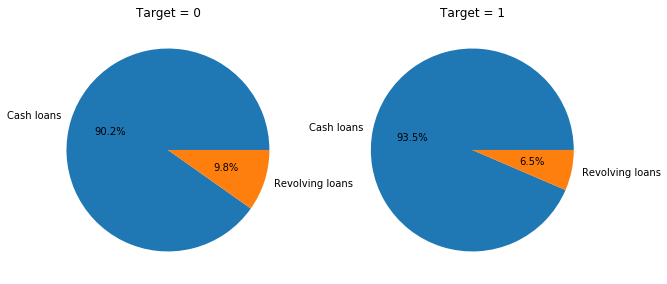

In [54]:
# Analyzing impact of contract type on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['NAME_CONTRACT_TYPE'].value_counts().plot.pie(ax = ax1,  figsize = [10,6],label='',title = 'Target = 0',autopct='%1.1f%%')
app_data_1['NAME_CONTRACT_TYPE'].value_counts().plot.pie(ax=ax2,  figsize = [10,6],label='',title = 'Target = 1',autopct='%1.1f%%')
plt.show()

# Insight to be documented

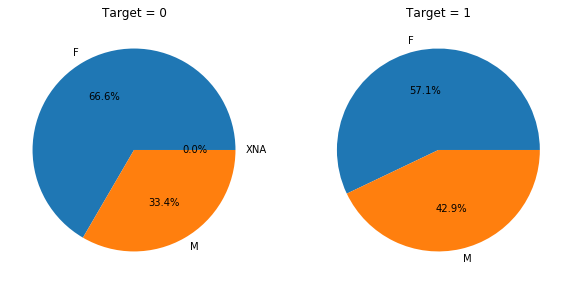

In [55]:
# Analyzing impact of Education Type on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['CODE_GENDER'].value_counts().plot.pie(ax = ax1,  figsize = [10,6],label='',title = 'Target = 0',autopct='%1.1f%%')
app_data_1['CODE_GENDER'].value_counts().plot.pie(ax=ax2,  figsize = [10,6],label='',title = 'Target = 1',autopct='%1.1f%%')
#sns.distplot(app_data_0['CODE_GENDER'].value_counts(),ax=ax1)
#sns.distplot(app_data_1['CODE_GENDER'].value_counts(),ax=ax2)
plt.show()

# Insight to be documented

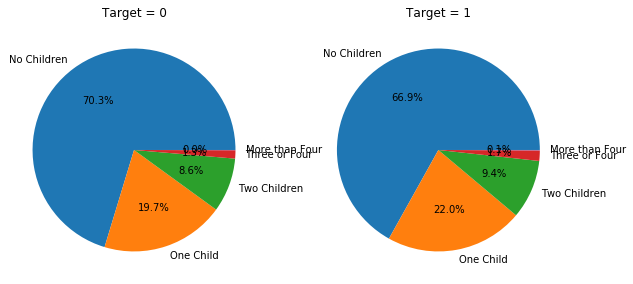

In [56]:
# Analyzing impact of Number of Children on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['CHILDREN_CAT'].value_counts().plot.pie(ax = ax1,  figsize = [10,6],label='',title = 'Target = 0',autopct='%1.1f%%')
app_data_1['CHILDREN_CAT'].value_counts().plot.pie(ax=ax2,  figsize = [10,6],label='',title = 'Target = 1',autopct='%1.1f%%')
plt.show()

# Insight to be documented

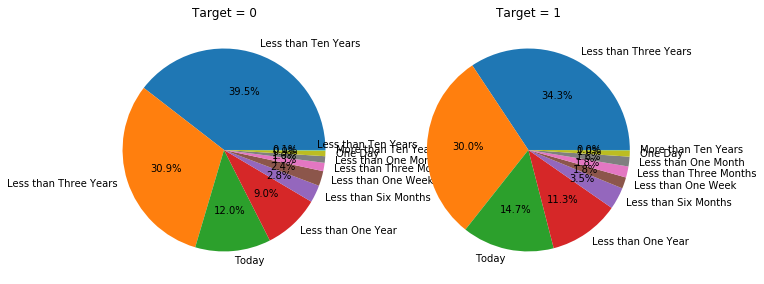

In [57]:
# Analyzing impact of Days Phone Change on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['DAYS_LAST_PHONE_CHANGE_CAT'].value_counts().plot.pie(ax = ax1,  figsize = [10,6],label='',title = 'Target = 0',autopct='%1.1f%%')
app_data_1['DAYS_LAST_PHONE_CHANGE_CAT'].value_counts().plot.pie(ax=ax2,  figsize = [10,6],label='',title = 'Target = 1',autopct='%1.1f%%')
plt.show()

# Insight to be documented

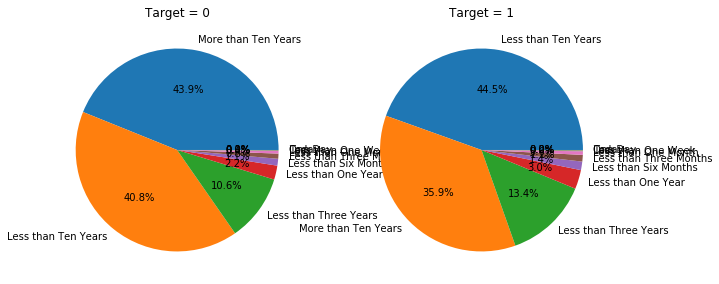

In [58]:
# Analyzing impact of Days ID Publish on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['DAYS_ID_PUBLISH_CAT'].value_counts().plot.pie(ax = ax1,  figsize = [10,6],label='',title = 'Target = 0',autopct='%1.1f%%')
app_data_1['DAYS_ID_PUBLISH_CAT'].value_counts().plot.pie(ax=ax2,  figsize = [10,6],label='',title = 'Target = 1',autopct='%1.1f%%')
plt.show()

# Insight to be documented

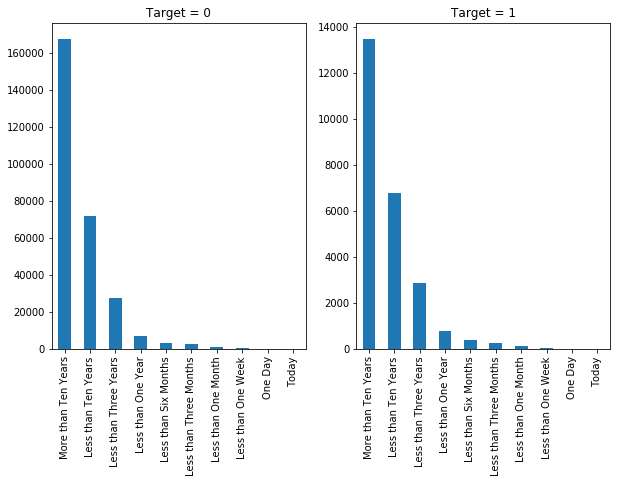

In [59]:
# Analyzing impact of Days registration on loan default
fig, (ax1,ax2) =plt.subplots(1,2)
app_data_0['DAYS_REGISTRATION_CAT'].value_counts().plot.bar(ax = ax1,  figsize = [10,6],label='',title = 'Target = 0')
app_data_1['DAYS_REGISTRATION_CAT'].value_counts().plot.bar(ax = ax2,  figsize = [10,6],label='',title = 'Target = 1')
plt.show()

# Insight to be documented

## UNIVARIATE ANALYSIS ON NUMERICAL VARIABLES

### Analysis to be performed
#### 1. Annuity amount
#### 2. Credit Amount

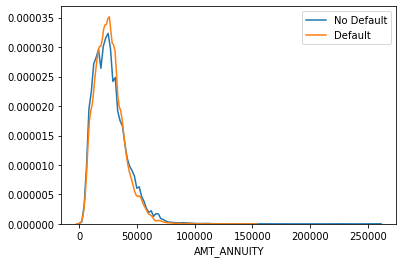

In [60]:
#Checking impact of annunity amount on default
sns.distplot(app_data_0["AMT_ANNUITY"].dropna(), hist= False, label='No Default')
sns.distplot(app_data_1["AMT_ANNUITY"].dropna(), hist= False, label='Default')
plt.show()

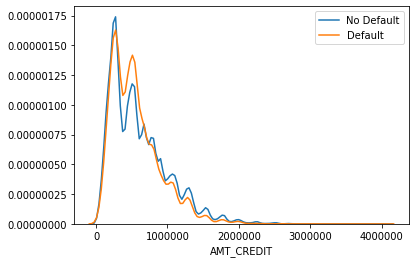

In [61]:
#Checking impact of Credit_loan on default


sns.distplot(app_data_0["AMT_CREDIT"].dropna(), hist= False, label='No Default')
sns.distplot(app_data_1["AMT_CREDIT"].dropna(), hist= False, label='Default')
plt.show()

### Bivariate Analysis

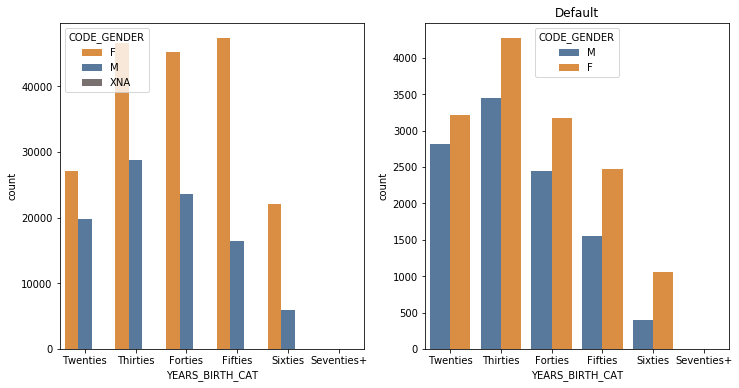

In [62]:
#Checking impact of Age Group and Gender on Defaulting
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(12,6))
colors = {'F': "#F28E2B", 'M': "#4E79A7", 'XNA': "#79706E"}
plt.title("No Default")
sns.countplot(ax=ax1,x="YEARS_BIRTH_CAT",data=app_data_0,hue="CODE_GENDER",palette=colors)
plt.title("Default")
sns.countplot(ax=ax2,x="YEARS_BIRTH_CAT",data=app_data_1,hue="CODE_GENDER",palette=colors)

plt.show()


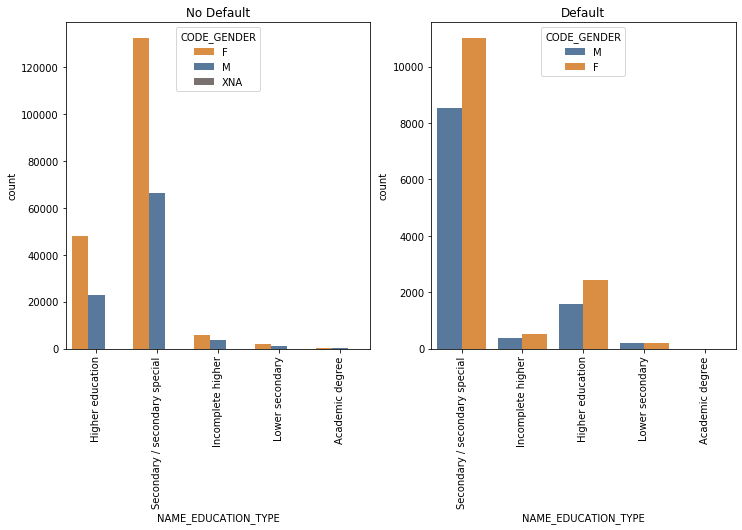

In [63]:
#Education Type and Gender
plt.figure(figsize=(12,6))
colors = {'F': "#F28E2B", 'M': "#4E79A7", 'XNA': "#79706E"}
plt.subplot(1,2,1)
plt.title("No Default")
sns.countplot(x="NAME_EDUCATION_TYPE",hue="CODE_GENDER",data=app_data_0,palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(x="NAME_EDUCATION_TYPE",hue="CODE_GENDER",data=app_data_1,palette=colors)
plt.xticks(rotation=90)
plt.show()




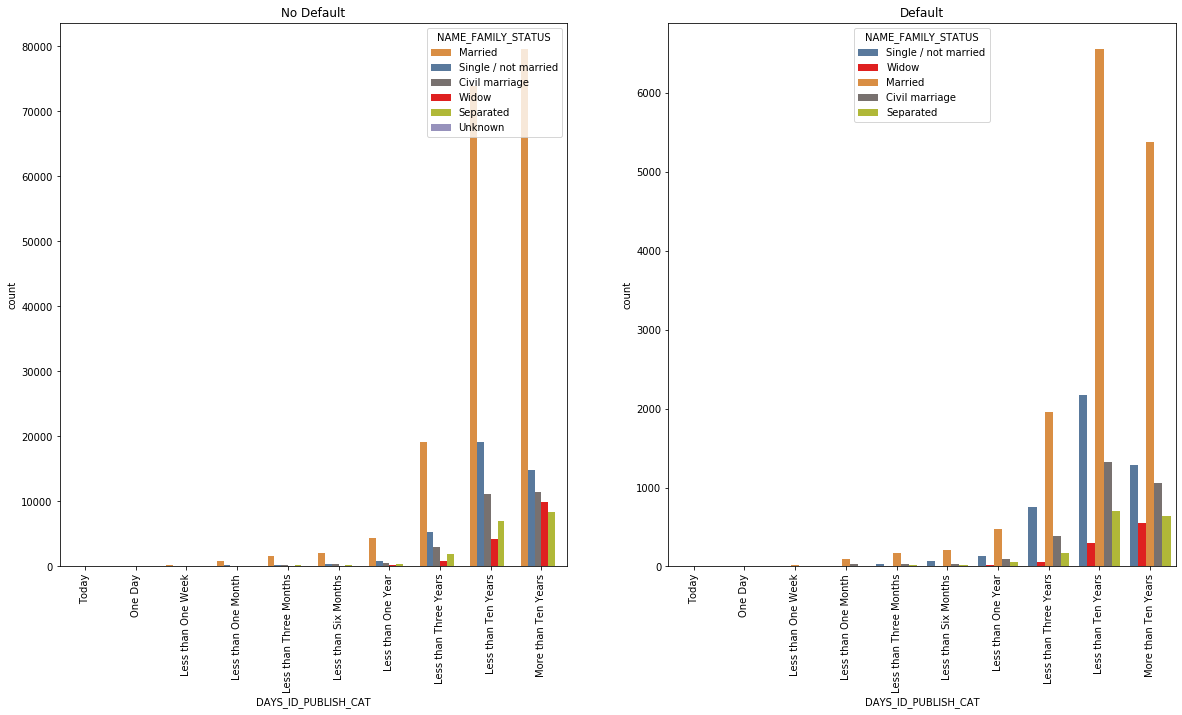

In [64]:
#Checking impact of duration of Id Change and Family status
plt.figure(figsize=(20,10))
colors={'Married': "#F28E2B",'Single / not married':"#4E79A7", 'Civil marriage': "#79706E", 
        'Widow':"r", 'Separated':"#C2CD23", 'Unknown':"#918BC3"}

plt.subplot(1,2,1)
plt.title("No Default")
sns.countplot(x="DAYS_ID_PUBLISH_CAT",hue="NAME_FAMILY_STATUS",data=app_data_0,palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(x="DAYS_ID_PUBLISH_CAT",hue="NAME_FAMILY_STATUS",data=app_data_1,palette=colors)
plt.xticks(rotation=90)
plt.show()


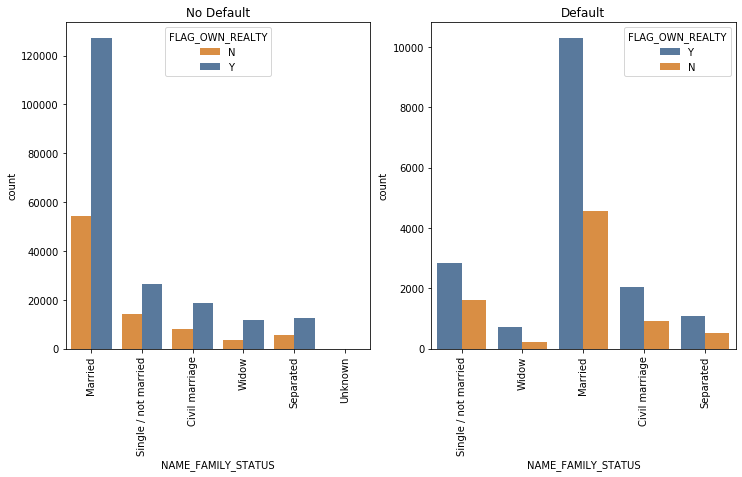

In [65]:
#Checking impact of Family status and house ownership on defaulting
plt.figure(figsize=(12,6))
colors = {'N': "#F28E2B", 'Y': "#4E79A7"}
plt.subplot(1,2,1)
plt.title("No Default")
sns.countplot(x="NAME_FAMILY_STATUS",hue="FLAG_OWN_REALTY",data=app_data_0,palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(x="NAME_FAMILY_STATUS",hue="FLAG_OWN_REALTY",data=app_data_1,palette=colors)
plt.xticks(rotation=90)
plt.show()


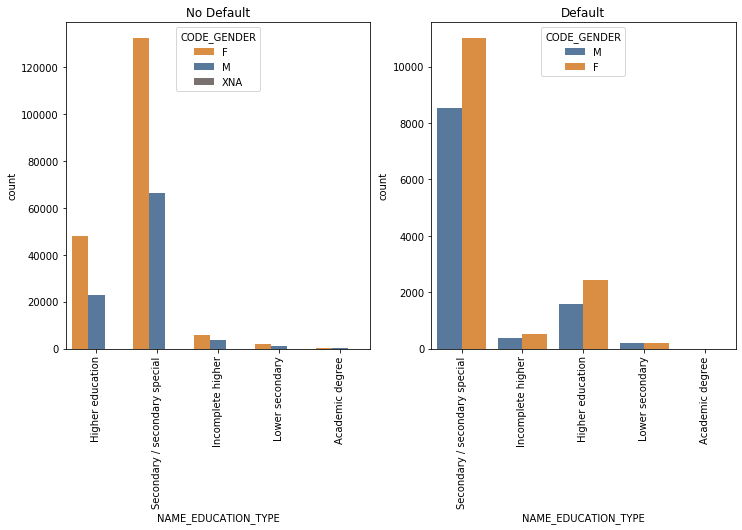

In [66]:
#Checking impact of  Education and gender on defaulting
plt.figure(figsize=(12,6))
colors = {'F': "#F28E2B", 'M': "#4E79A7", 'XNA': "#79706E"}
plt.subplot(1,2,1)
plt.title("No Default")
sns.countplot(x="NAME_EDUCATION_TYPE",hue="CODE_GENDER",data=app_data_0,palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(x="NAME_EDUCATION_TYPE",hue="CODE_GENDER",data=app_data_1,palette=colors)
plt.xticks(rotation=90)
plt.show()

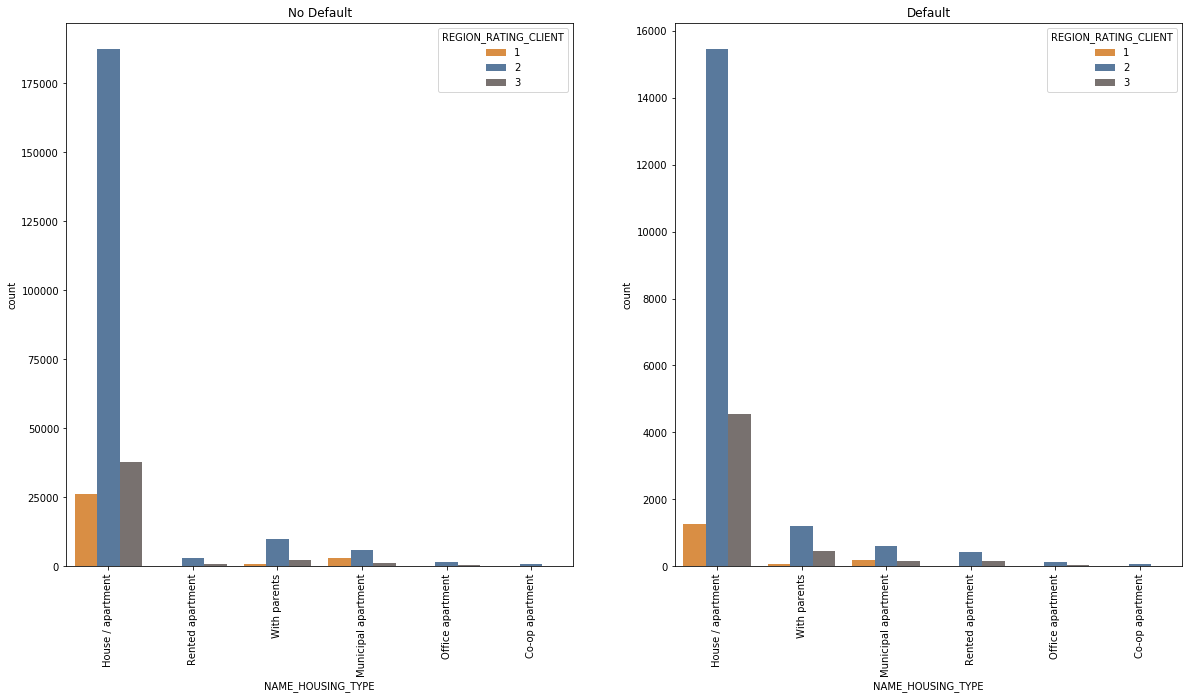

In [67]:
#Checking impact of Housing situation in a particular region rating on defaulting
plt.figure(figsize=(20,10))
colors = {1: "#F28E2B", 2: "#4E79A7", 3: "#79706E"}
plt.subplot(1,2,1)
plt.title("No Default")
sns.countplot(x="NAME_HOUSING_TYPE",hue="REGION_RATING_CLIENT",data=app_data_0,palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(x="NAME_HOUSING_TYPE",hue="REGION_RATING_CLIENT",data=app_data_1,palette=colors)
plt.xticks(rotation=90)
plt.show()

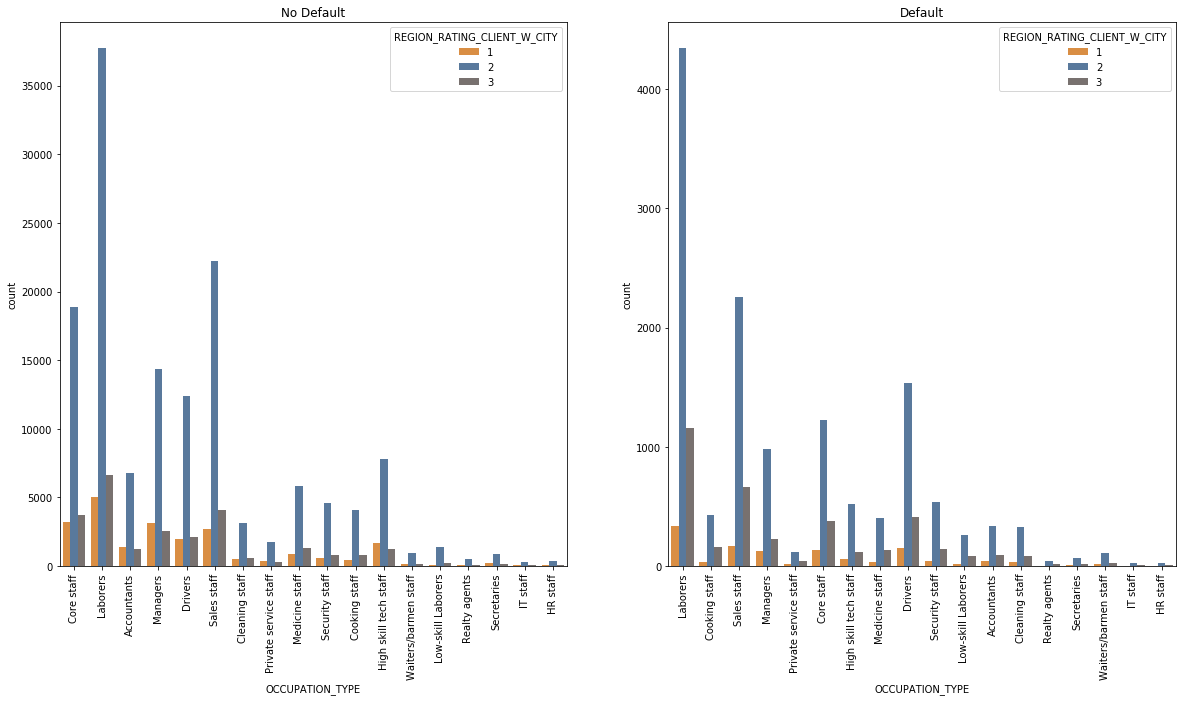

In [68]:
#Checking impact of Housing situation in a particular city rating on defaulting
plt.figure(figsize=(20,10))
colors = {1: "#F28E2B", 2: "#4E79A7", 3: "#79706E"}
plt.subplot(1,2,1)
plt.title("No Default")
sns.countplot(x="OCCUPATION_TYPE",hue="REGION_RATING_CLIENT_W_CITY",data=app_data_0,palette=colors)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.countplot(x="OCCUPATION_TYPE",hue="REGION_RATING_CLIENT_W_CITY",data=app_data_1,palette=colors)
plt.xticks(rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


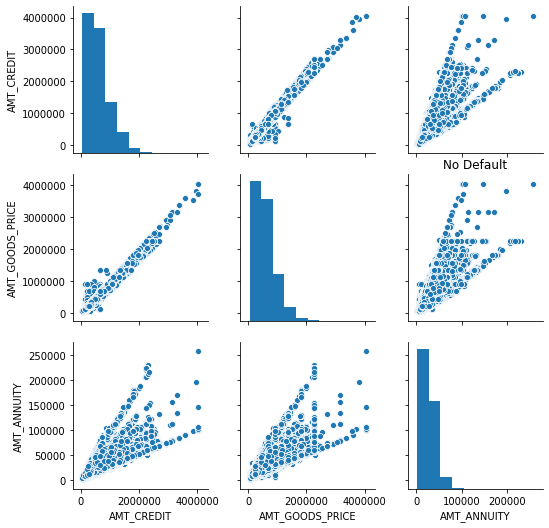

In [69]:
#Pairplot for no defaulting
sns.pairplot(data=app_data_0,x_vars=['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY'], y_vars=['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY'])
plt.title("No Default")
plt.xticks(rotation=90)
plt.show()

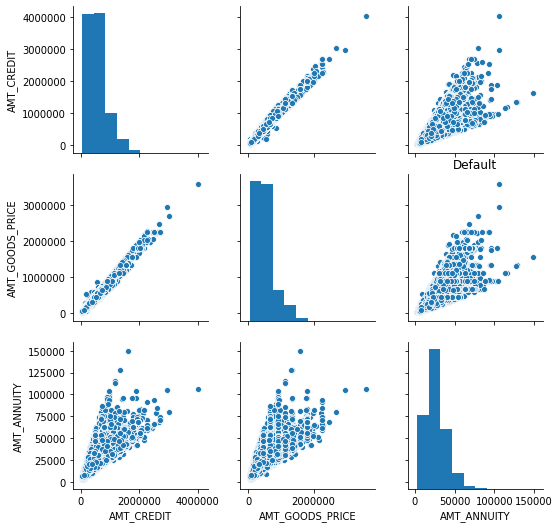

In [70]:
#Pairplot for defaulting
sns.pairplot(data=app_data_1,x_vars=['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY'], y_vars=['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY'])
plt.title("Default")
plt.xticks(rotation=90)
plt.show()

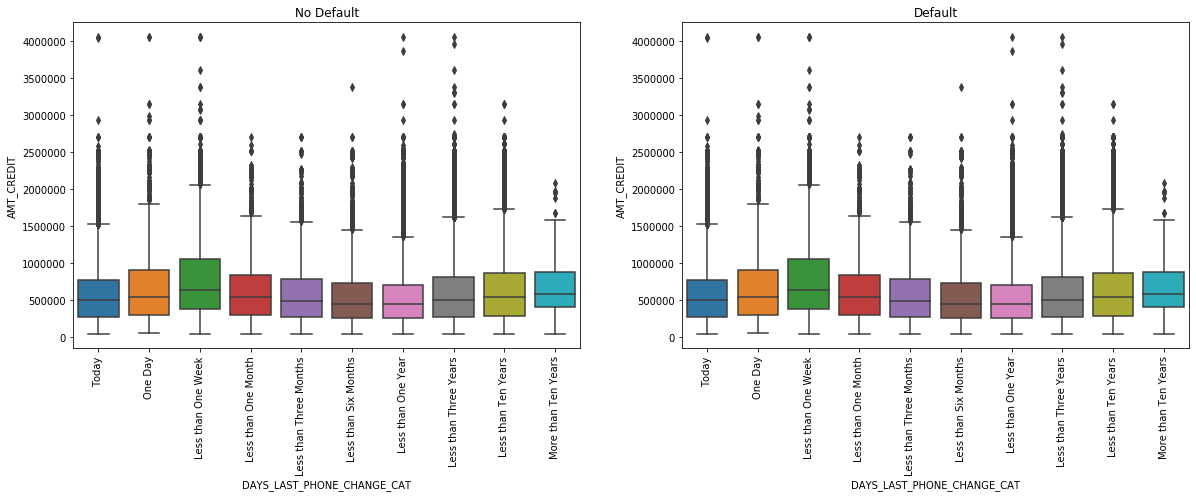

In [71]:
#Checking impact of Phone change duration and credit amount of the loan 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("No Default")
sns.boxplot(data=app_data_0,y="AMT_CREDIT",x="DAYS_LAST_PHONE_CHANGE_CAT")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.boxplot(data=app_data_0,y="AMT_CREDIT",x="DAYS_LAST_PHONE_CHANGE_CAT")
plt.xticks(rotation=90)
plt.show()

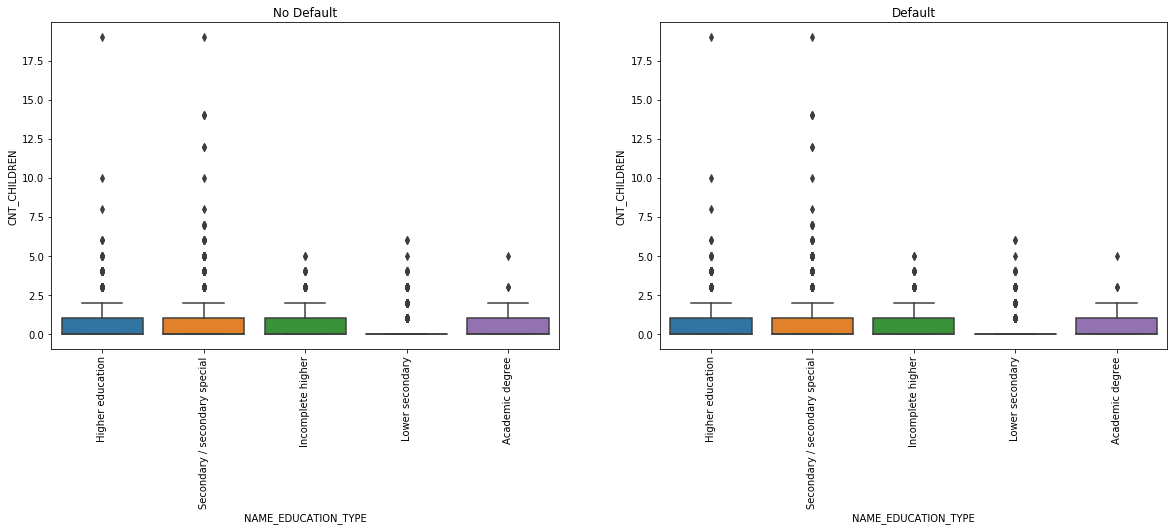

In [72]:
#Checking impact of education type and counto of children
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("No Default")
sns.boxplot(data=app_data_0,y="CNT_CHILDREN",x="NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.boxplot(data=app_data_0,y="CNT_CHILDREN",x="NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.show()

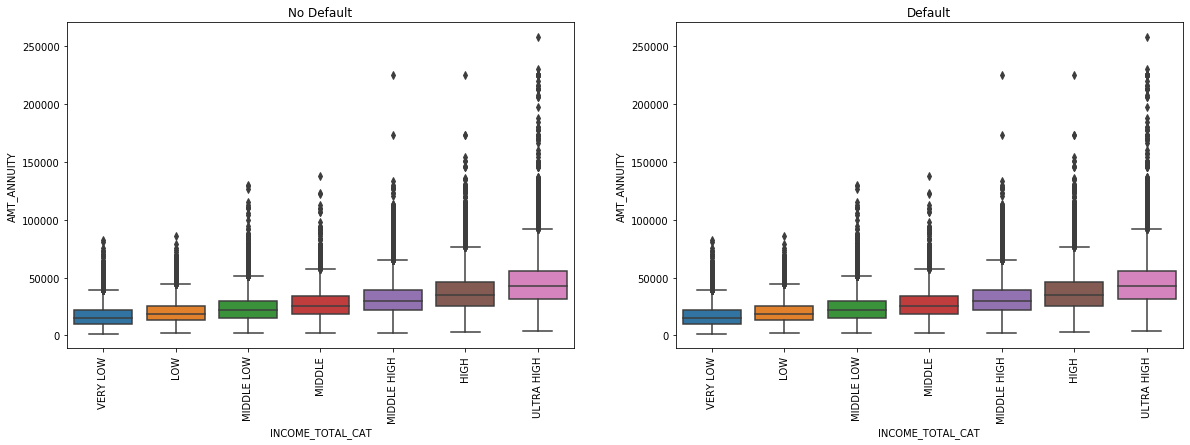

In [73]:
#Checking impact of Income type and Annunity amount 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("No Default")
sns.boxplot(data=app_data_0,y="AMT_ANNUITY",x="INCOME_TOTAL_CAT")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.boxplot(data=app_data_0,y="AMT_ANNUITY",x="INCOME_TOTAL_CAT")
plt.xticks(rotation=90)
plt.show()

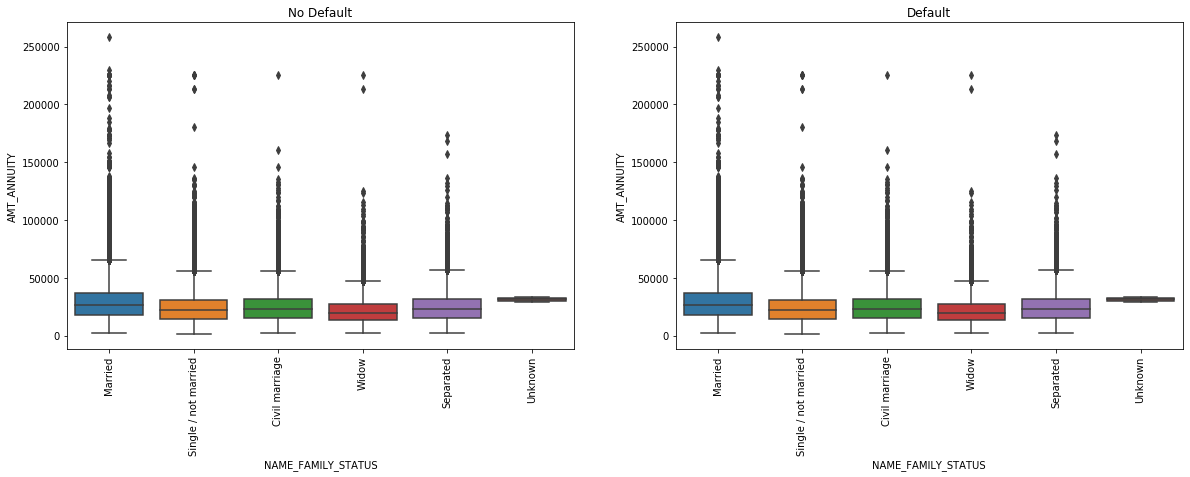

In [74]:
#Checking impact of Income type and Annunity amount 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("No Default")
sns.boxplot(data=app_data_0,y="AMT_ANNUITY",x="NAME_FAMILY_STATUS")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Default")
sns.boxplot(data=app_data_0,y="AMT_ANNUITY",x="NAME_FAMILY_STATUS")
plt.xticks(rotation=90)
plt.show()

In [75]:
#Correlation on No defaulting application data
corr_list=list(['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','DAYS_REGISTRATION'
                ,'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_HOUR'])
app_data_0[corr_list].corr()


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR
AMT_INCOME_TOTAL,1.00,0.34,0.42,0.35,-0.14,-0.06,-0.02,0.04,0.03,0.00
AMT_CREDIT,0.34,1.00,0.77,0.99,-0.07,-0.01,0.00,0.07,0.06,-0.00
AMT_ANNUITY,0.42,0.77,1.00,0.78,-0.10,-0.04,-0.01,0.06,0.08,0.00
AMT_GOODS_PRICE,0.35,0.99,0.78,1.00,-0.07,-0.02,0.00,0.07,0.06,-0.00
YEARS_EMPLOYED,-0.14,-0.07,-0.10,-0.07,1.00,0.21,0.28,-0.02,-0.24,-0.00
DAYS_REGISTRATION,-0.06,-0.01,-0.04,-0.02,0.21,1.00,0.10,0.05,-0.18,0.00
DAYS_ID_PUBLISH,-0.02,0.00,-0.01,0.00,0.28,0.10,1.00,0.08,0.02,-0.00
DAYS_LAST_PHONE_CHANGE,0.04,0.07,0.06,0.07,-0.02,0.05,0.08,1.00,0.03,0.00
CNT_FAM_MEMBERS,0.03,0.06,0.08,0.06,-0.24,-0.18,0.02,0.03,1.00,0.00
AMT_REQ_CREDIT_BUREAU_HOUR,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,1.00


In [76]:
#Correlation on defaulting application data
corr_list=list(['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','DAYS_REGISTRATION'
                ,'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_HOUR'])
app_data_1[corr_list].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR
AMT_INCOME_TOTAL,1.00,0.04,0.05,0.04,-0.01,-0.00,0.00,0.00,0.01,0.00
AMT_CREDIT,0.04,1.00,0.75,0.98,0.00,0.03,0.05,0.11,0.05,-0.01
AMT_ANNUITY,0.05,0.75,1.00,0.75,-0.08,-0.03,0.02,0.08,0.08,0.01
AMT_GOODS_PRICE,0.04,0.98,0.75,1.00,0.01,0.03,0.06,0.12,0.05,-0.00
YEARS_EMPLOYED,-0.01,0.00,-0.08,0.01,1.00,0.19,0.23,0.00,-0.19,-0.01
DAYS_REGISTRATION,-0.00,0.03,-0.03,0.03,0.19,1.00,0.10,0.07,-0.15,0.00
DAYS_ID_PUBLISH,0.00,0.05,0.02,0.06,0.23,0.10,1.00,0.12,0.03,-0.00
DAYS_LAST_PHONE_CHANGE,0.00,0.11,0.08,0.12,0.00,0.07,0.12,1.00,0.01,-0.00
CNT_FAM_MEMBERS,0.01,0.05,0.08,0.05,-0.19,-0.15,0.03,0.01,1.00,-0.00
AMT_REQ_CREDIT_BUREAU_HOUR,0.00,-0.01,0.01,-0.00,-0.01,0.00,-0.00,-0.00,-0.00,1.00


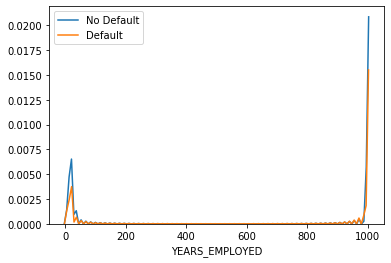

In [77]:
#Checking impact of Total Income on default


sns.distplot(app_data_0["YEARS_EMPLOYED"].dropna(), hist= False, label='No Default')
sns.distplot(app_data_1["YEARS_EMPLOYED"].dropna(), hist= False, label='Default')
plt.show()

## ANALYSIS OF PREVIOUS APPLICATIONS

In [78]:
prev_app.head(15)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan
5,1383531,199383,Cash loans,23703.93,315000.00,340573.50,nan,315000.00,SATURDAY,8,Y,1,nan,nan,nan,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.00,low_normal,Cash X-Sell: low,365243.00,-654.00,-144.00,-144.00,-137.00,1.00
6,2315218,175704,Cash loans,nan,0.00,0.00,nan,nan,TUESDAY,11,Y,1,nan,nan,nan,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
7,1656711,296299,Cash loans,nan,0.00,0.00,nan,nan,MONDAY,7,Y,1,nan,nan,nan,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
8,2367563,342292,Cash loans,nan,0.00,0.00,nan,nan,MONDAY,15,Y,1,nan,nan,nan,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
9,2579447,334349,Cash loans,nan,0.00,0.00,nan,nan,SATURDAY,15,Y,1,nan,nan,nan,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan


In [99]:
prev_app.shape

(1670214, 38)

In [98]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,LAST_APPLY_FLAG
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,5951.00,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00,1670214.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33,0.99
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,0.09,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47,0.07
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,0.16,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00,1.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00,1.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00,1.00


In [79]:
prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

### Univariate Analysis - Categorical Variables
#### 1. Contract Type
#### 2. Weekday Process Start
#### 3. Contract Status
#### 4. Client Type
#### 5. Goods Category
#### 6. Portfolio Name
#### 7. Loan Purpose

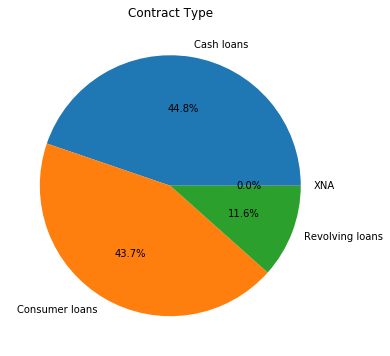

In [80]:
# Analyzing Contract Type
prev_app['NAME_CONTRACT_TYPE'].value_counts().plot.pie(figsize = [10,6],label='',title = 'Contract Type',autopct='%1.1f%%')
plt.show()

# Insight to be documented

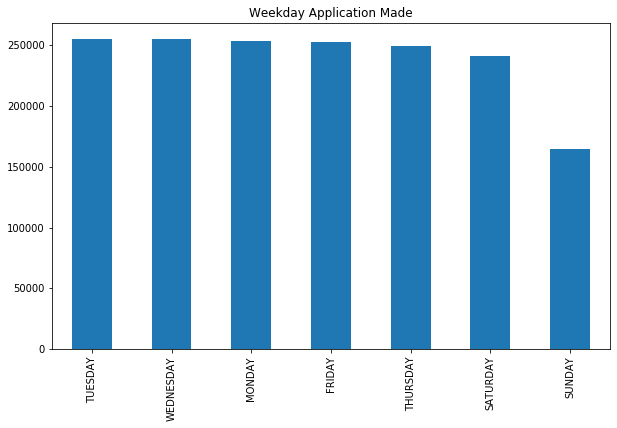

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [81]:
# Analyzing Weekday of Application
prev_app['WEEKDAY_APPR_PROCESS_START'].value_counts().plot.bar(figsize = [10,6],title = 'Weekday Application Made')
plt.show()
prev_app['WEEKDAY_APPR_PROCESS_START'].value_counts()
# Insight to be documented

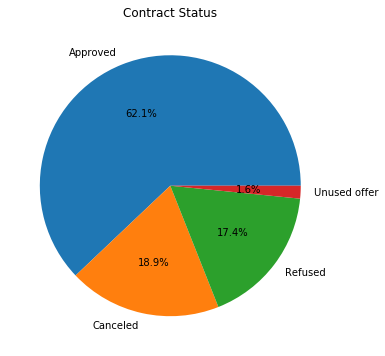

In [82]:
# Analyzing Contract Status
prev_app['NAME_CONTRACT_STATUS'].value_counts().plot.pie(figsize = [10,6],label='',title = 'Contract Status',autopct='%1.1f%%')
plt.show()

# Insight to be documented

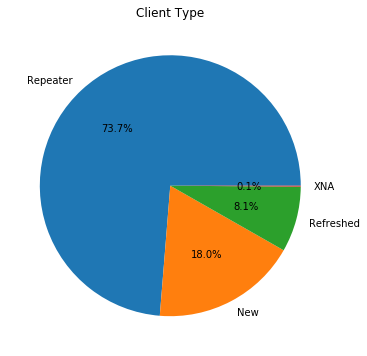

In [83]:
# Analyzing Client Type
prev_app['NAME_CLIENT_TYPE'].value_counts().plot.pie(figsize = [10,6],label='',title = 'Client Type',autopct='%1.1f%%')
plt.show()

# Insight to be documented

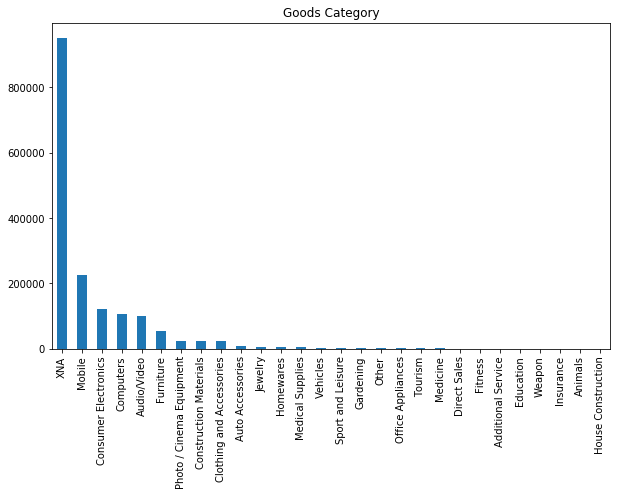

In [84]:
# Analyzing Goods Category
prev_app['NAME_GOODS_CATEGORY'].value_counts().plot.bar(figsize = [10,6],label='',title = 'Goods Category')
plt.show()

# Insight to be documented

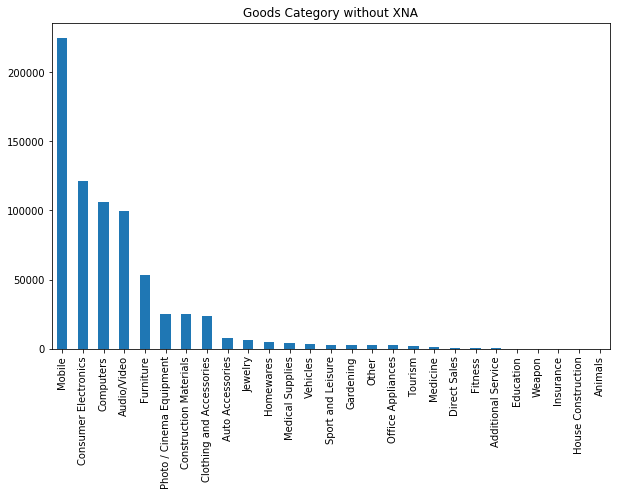

In [85]:
#Since XNA is the biggest component of Goods category, re-analyzing by removing 'XNA' from the data
temp=prev_app[prev_app.NAME_GOODS_CATEGORY != 'XNA']
temp['NAME_GOODS_CATEGORY'].value_counts().plot.bar(figsize = [10,6],label='',title = 'Goods Category without XNA')
plt.show()

# Insight to be documented

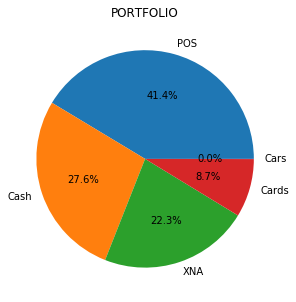

In [86]:
# Analyzing Portfolio Name
prev_app['NAME_PORTFOLIO'].value_counts().plot.pie(figsize = [10,5],label='',title = 'PORTFOLIO',autopct='%1.1f%%')
plt.show()

# Insight to be documented

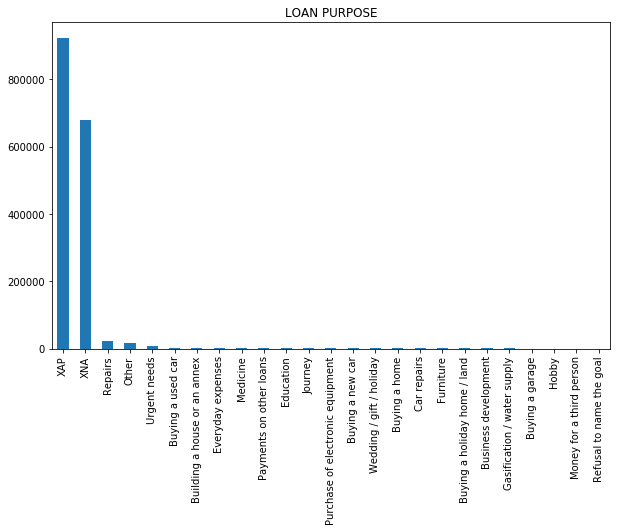

In [87]:
# Analyzing Loan Purpose
prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts().plot.bar(figsize = [10,6],label='',title = 'LOAN PURPOSE')
plt.show()

# Insight to be documented

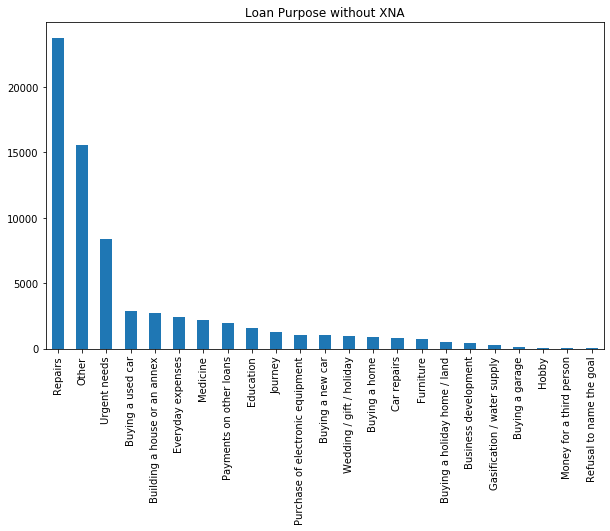

In [88]:
#Since XAP and XNA is the biggest component of Loan Purpose, re-analyzing by removing 'XNA' from the data
temp=prev_app.loc[(prev_app.NAME_CASH_LOAN_PURPOSE != 'XNA') & (prev_app.NAME_CASH_LOAN_PURPOSE != 'XAP')]
temp['NAME_CASH_LOAN_PURPOSE'].value_counts().plot.bar(figsize = [10,6],label='',title = 'Loan Purpose without XNA')
plt.show()

# Insight to be documented

### Univariate Analysis - Numerical Variables
#### 1. AMT ANNUITY
#### 2. AMT CREDIT
#### 3. AMT DOWN PAYMENT
#### 4. AMT GOODS PRICE

In [89]:
prev_app.describe() #identifying relevant numerical variables

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,5951.00,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,0.09,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,0.16,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


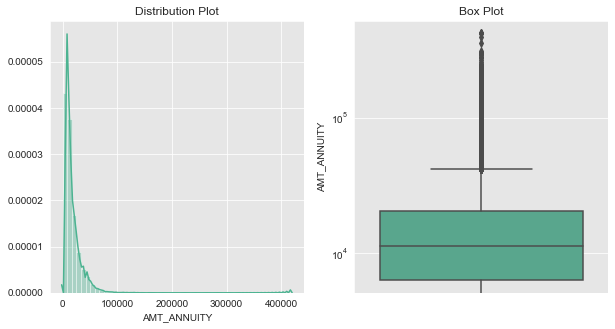

In [90]:
#Analysis of Annuity Amount
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(10,5))
ax[0].set_title("Distribution Plot")
sns.distplot(prev_app[~prev_app['AMT_ANNUITY'].isna()]['AMT_ANNUITY'],ax=ax[0], color="#4CB391")

ax[1].set_title("Box Plot")
sns.boxplot(data =prev_app, x='AMT_ANNUITY',ax=ax[1],orient='v', color="#4CB391")
plt.yscale('log')
plt.show()

#Insights to be documented

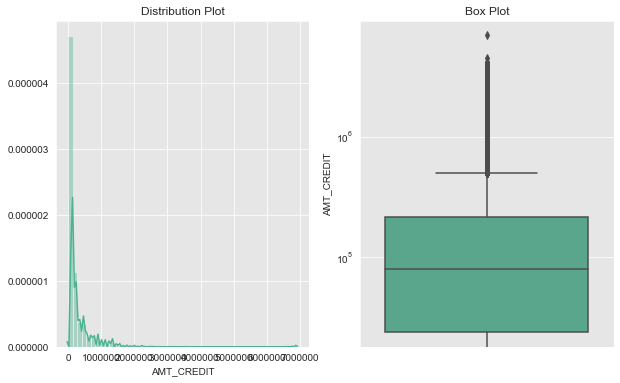

In [91]:
#Analysis of Credit Amount
#sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(10,6))
ax[0].set_title("Distribution Plot")
sns.distplot(prev_app[~prev_app['AMT_CREDIT'].isna()]['AMT_CREDIT'],ax=ax[0], color="#4CB391")

ax[1].set_title("Box Plot")
sns.boxplot(data =prev_app, x='AMT_CREDIT',ax=ax[1],orient='v', color="#4CB391")
plt.yscale('log')
plt.show()

#Insights to be documented

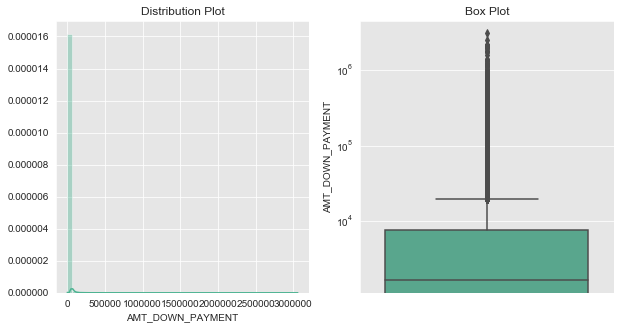

In [92]:
#Analysis of Down Payment Amount

fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(10,5))
ax[0].set_title("Distribution Plot")
sns.distplot(prev_app[~prev_app['AMT_DOWN_PAYMENT'].isna()]['AMT_DOWN_PAYMENT'],ax=ax[0], color="#4CB391")

ax[1].set_title("Box Plot")
sns.boxplot(data =prev_app, x='AMT_DOWN_PAYMENT',ax=ax[1],orient='v', color="#4CB391")
plt.yscale('log')
plt.show()

#Insights to be documented

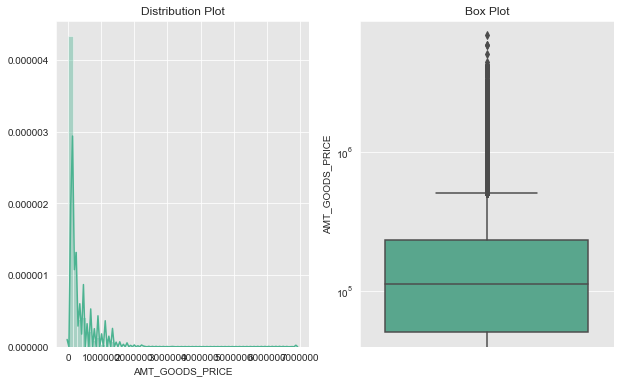

In [93]:
#Analysis of Goods Price

fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(10,6))
ax[0].set_title("Distribution Plot")
sns.distplot(prev_app[~prev_app['AMT_GOODS_PRICE'].isna()]['AMT_GOODS_PRICE'],ax=ax[0], color="#4CB391")

ax[1].set_title("Box Plot")
sns.boxplot(data =prev_app, x='AMT_GOODS_PRICE',ax=ax[1],orient='v', color="#4CB391")
plt.yscale('log')
plt.show()

#Insights to be documented

### BIVARIATE ANALYSIS - CATEGORICAL + CATEGORICAL
#### 1. Contract Type
#### 2. Contract Status
#### 3. Loan Purpose

In [94]:
#Categorizing the last apply per contract
prev_app['LAST_APPLY_FLAG']=np.where(prev_app['FLAG_LAST_APPL_PER_CONTRACT'] == 'Y',1,0)
prev_app['LAST_APPLY_FLAG'].value_counts()

1    1661739
0       8475
Name: LAST_APPLY_FLAG, dtype: int64

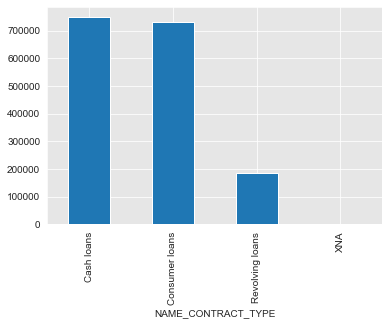

In [95]:
#Bar graph of contract type with total value of LAST_APPLY_FLAG
prev_app['LAST_APPLY_FLAG'].groupby(prev_app['NAME_CONTRACT_TYPE']).sum().plot.bar()
plt.show()

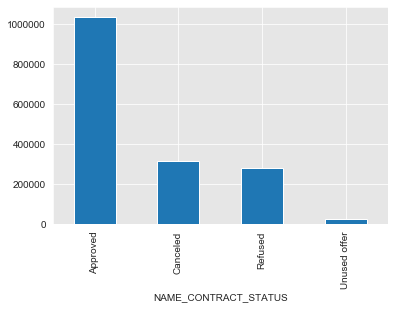

In [96]:
#Bar graph of contract status with total value of LAST_APPLY_FLAG
prev_app['LAST_APPLY_FLAG'].groupby(prev_app['NAME_CONTRACT_STATUS']).sum().plot.bar()
plt.show()

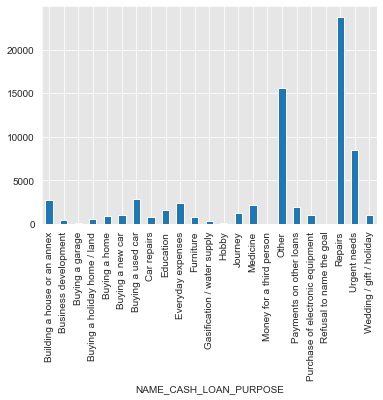

In [97]:
#Bar graph of loan purpose with total value of LAST_APPLY_FLAG
prev_app['LAST_APPLY_FLAG'].groupby(temp['NAME_CASH_LOAN_PURPOSE']).sum().plot.bar()
plt.show()

### BIVARIATE ANALYSIS - CATEGORICAL + NUMERICAL
#### 1. Contract Type
#### 2. Weekday Process Start
#### 3. Contract Status
#### 4. Client Type
#### 5. Goods Category
#### 6. Portfolio Name
#### 7. Loan Purpose

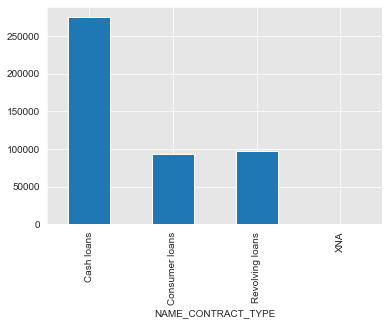

In [111]:
#Bar graph of CONTRACT TYPE with avg value of Application Amount
prev_app['AMT_APPLICATION'].groupby(prev_app['NAME_CONTRACT_TYPE']).mean().plot.bar()
plt.show()

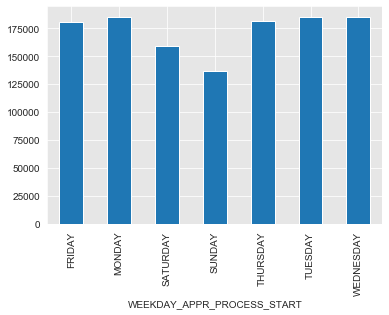

In [110]:
#Bar graph of WEEKDAY with avg value of Application Amount
prev_app['AMT_APPLICATION'].groupby(prev_app['WEEKDAY_APPR_PROCESS_START']).mean().plot.bar()
plt.show()

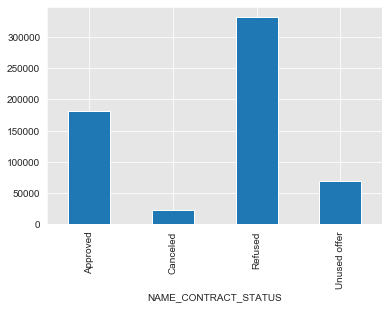

In [109]:
#Bar graph of Contract Status with avg value of Application Amount
prev_app['AMT_APPLICATION'].groupby(prev_app['NAME_CONTRACT_STATUS']).mean().plot.bar()
plt.show()

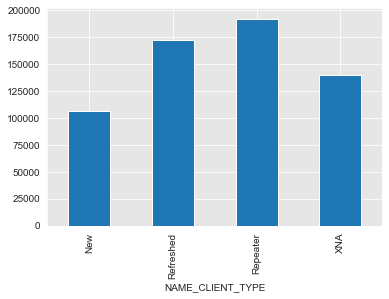

In [108]:
#Bar graph of Client Type with avg value of Application Amount
prev_app['AMT_APPLICATION'].groupby(prev_app['NAME_CLIENT_TYPE']).mean().plot.bar()
plt.show()

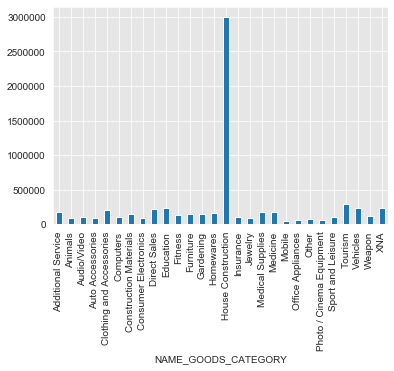

In [107]:
#Bar graph of Goods Category with avg value of Application Amount
prev_app['AMT_APPLICATION'].groupby(prev_app['NAME_GOODS_CATEGORY']).mean().plot.bar()
plt.show()

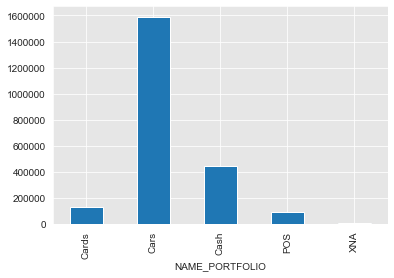

In [106]:
#Bar graph of Portfolio with avg value of Application Amount
prev_app['AMT_APPLICATION'].groupby(prev_app['NAME_PORTFOLIO']).mean().plot.bar()
plt.show()

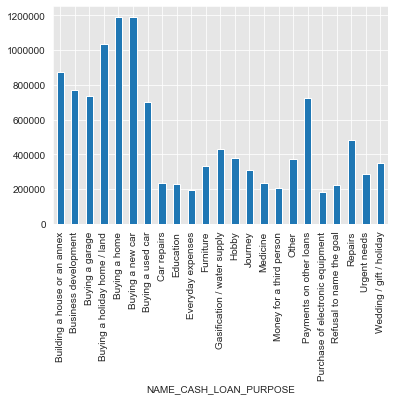

In [104]:
#Bar graph of loan purpose with avg value of Application Amount
prev_app['AMT_APPLICATION'].groupby(temp['NAME_CASH_LOAN_PURPOSE']).mean().plot.bar()
plt.show()

### BIVARIATE ANALYSIS - NUMERICAL + NUMERICAL
#### 1. Loan Amount
#### 2. Annuity
#### 3. Down Payment
#### 4. Goods Price

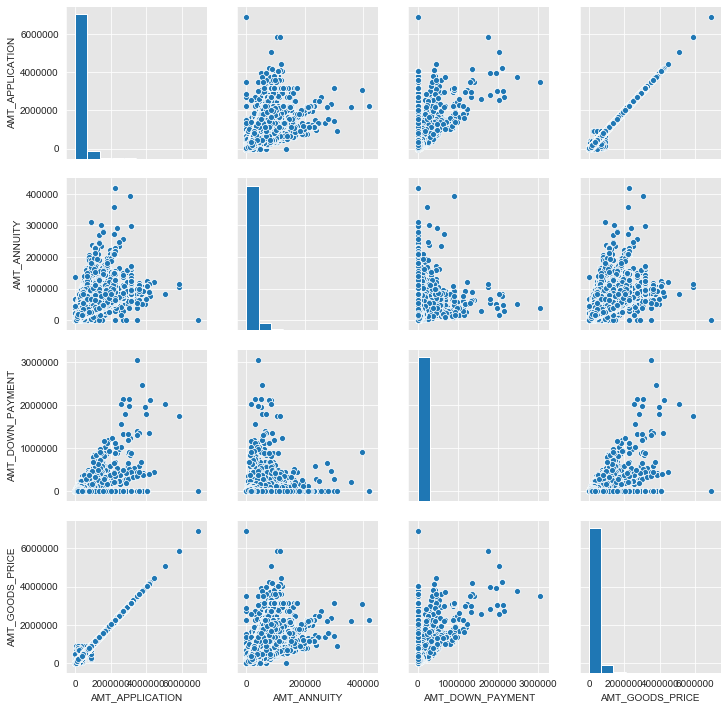

In [113]:
#Pairplot for variables
pair = prev_app[['AMT_APPLICATION', 'AMT_ANNUITY', 'AMT_DOWN_PAYMENT','AMT_GOODS_PRICE']].fillna(0)
sns.pairplot(pair)

plt.show()

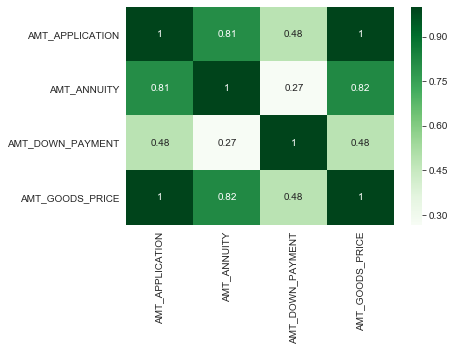

In [138]:
# Heatmap for variables
sns.heatmap(prev_app[['AMT_APPLICATION', 'AMT_ANNUITY', 'AMT_DOWN_PAYMENT','AMT_GOODS_PRICE']].corr(),annot=True,cmap='Greens')
plt.show()